# Use optimizer to find n,k for known thickness and to find thickness for known n,k.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from Matrix_methods.Simulate import simulate_reference, simulate_parallel
from Matrix_methods.TimeDomain_extractor import TimeDomainExtractorNK, TimeDomainExtractorD

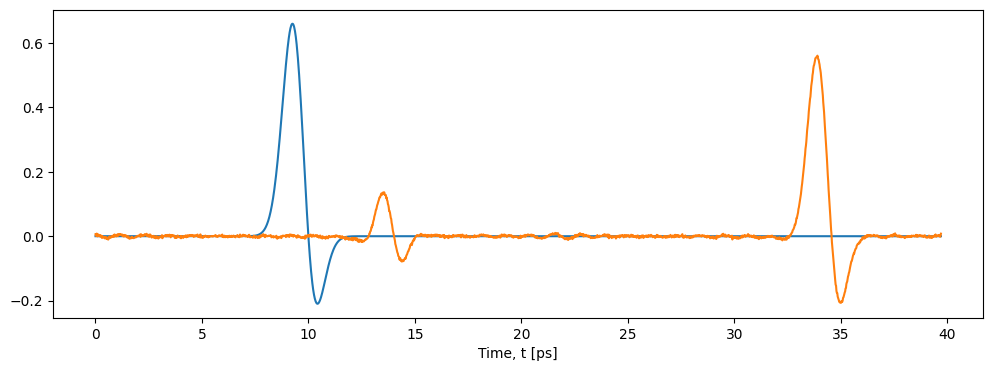

In [2]:
# Define simulation parameters
deltat = 0.0194e-12  # Time step
L = 2**11  # Number of time points

# Generate reference pulse
reference_pulse = simulate_reference(L, deltat)

n = 3.46
k = 0.01

# Experimental material parameters (ground truth)
material_params_exp = [(n+1j*k, 3 * 1e-3)]

# Simulate the experimental data
t_axis = np.arange(0, L * deltat, deltat)
_, experimental_pulse = simulate_parallel(reference_pulse, material_params_exp, deltat, noise_level=0.002)
experimental_pulse = experimental_pulse[:L]


plt.figure(figsize=(12,4))
plt.plot(t_axis*1e12, reference_pulse)
plt.plot(t_axis*1e12, experimental_pulse.detach().cpu().numpy())
plt.xlabel('Time, t [ps]')
plt.show()

## Extract n & k for known D (thickness)

In [ ]:
n_init, k_init, D = 3.40, 0.015, 3e-3
TDE = TimeDomainExtractorNK(reference_pulse, experimental_pulse, deltat, n_init, k_init, D, lr=0.001)
optimized_n, optimized_k = TDE.optimize(num_iterations=150, updates=10)

initial_params = [(n_init + 1j*k_init, D)]
initial_pulse = simulate_parallel(reference_pulse, initial_params, deltat)[1][:L]

In [ ]:
best_params = [(optimized_n + 1j*optimized_k, D)]
# TODO: find 
print(best_params)
best_pulse = simulate_parallel(reference_pulse, best_params, deltat)[1][:L]

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(t_axis * 1e12, reference_pulse, label='Reference Pulse')
plt.plot(t_axis * 1e12, experimental_pulse.detach().cpu().numpy(), label='Experimental Pulse')
plt.plot(t_axis * 1e12, initial_pulse.detach().cpu().numpy(), label='Initial Pulse')
plt.plot(t_axis * 1e12, best_pulse.detach().numpy(), label='Optimized Pulse')
plt.xlabel('Time [ps]')
plt.legend()
plt.title('Optimized Pulse after Backpropagation')
plt.show()

## Finding D for known n & k

In [3]:
D_init = 3.3 * 1e-3
TDE_D = TimeDomainExtractorD(reference_pulse, experimental_pulse, deltat, n, k, D_init, lr=0.01)
optimized_D = TDE_D.optimize(num_iterations=150, updates=10, alpha=1)

initial_params = [(n + 1j*k, D_init)]
initial_pulse = simulate_parallel(reference_pulse, initial_params, deltat)[1][:L]

Iteration 0, Loss: 0.01376812718808651, D: 0.003267163410782814
Iteration 10, Loss: 0.015166039578616619, D: 0.0032257481943815947
Iteration 20, Loss: 0.015805155038833618, D: 0.003205922432243824
Iteration 30, Loss: 0.015826787799596786, D: 0.00320353708229959
Iteration 40, Loss: 0.016465244814753532, D: 0.003154576290398836
Iteration 50, Loss: 0.00548339681699872, D: 0.003041780088096857
Iteration 60, Loss: 0.002105995547026396, D: 0.00297257280908525
Iteration 70, Loss: 0.0010898297186940908, D: 0.0030127454083412886
Iteration 80, Loss: 2.1337273210519925e-05, D: 0.003002151846885681
Iteration 90, Loss: 9.614448936190456e-05, D: 0.003000018186867237
Iteration 100, Loss: 1.3540093277697451e-05, D: 0.003001914359629154
Iteration 110, Loss: 2.8423801268218085e-05, D: 0.003001480596140027
Iteration 120, Loss: 1.7732259948388673e-05, D: 0.003000312950462103
Iteration 130, Loss: 1.210208392876666e-05, D: 0.002999868243932724
Iteration 140, Loss: 8.042814442887902e-06, D: 0.002999805146828

[((3.46+0.01j), 0.002999805146828294)]


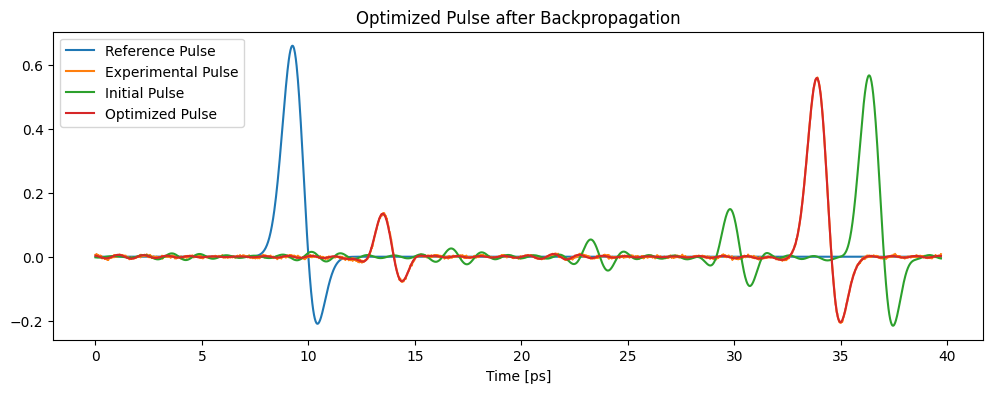

In [4]:
best_params = [(n + 1j*k, optimized_D)]
# TODO: find 
print(best_params)
best_pulse = simulate_parallel(reference_pulse, best_params, deltat)[1][:L]

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(t_axis * 1e12, reference_pulse, label='Reference Pulse')
plt.plot(t_axis * 1e12, experimental_pulse.detach().cpu().numpy(), label='Experimental Pulse')
plt.plot(t_axis * 1e12, initial_pulse.detach().cpu().numpy(), label='Initial Pulse')
plt.plot(t_axis * 1e12, best_pulse.detach().numpy(), label='Optimized Pulse')
plt.xlabel('Time [ps]')
plt.legend()
plt.title('Optimized Pulse after Backpropagation')
plt.show()